In [1]:
int(None)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [2]:
import numpy as np
import torch
import json
import matplotlib.pyplot as plt

from utils.aoj import AspenOpenJets, JetFeatures, ParticleClouds
from utils.tensorclass import TensorMultiModal
from utils.plotting import plot_hist_and_ratio

num_jets = 300_000
max_num_particles = 150

aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")

test, _ = aoj(num_jets=num_jets,
            download=False,      
            max_num_particles=max_num_particles,           
            features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": "tokens"},
            pt_order=True,
            padding='zeros',
            )

test = test.squeeze(-1, 'discrete')
aoj = JetFeatures(test) 

/home/df630/Multimodal-flows/multimodal_flows/utils/aoj.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness
#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPY

In [1]:

sample = TensorMultiModal.load_from('/home/df630/Multimodal-flows/jet_sequences/generated_sample_3000steps_1.0temp_fused_300K.h5')
# sample = sample.squeeze(-1, 'discrete')
# mmf = JetFeatures(sample)

NameError: name 'TensorMultiModal' is not defined

In [68]:
sample.discrete[33], sample.mask[33].squeeze(-1)

(tensor([1, 3, 2, 1, 3, 1, 4, 1, 3, 3, 4, 3, 1, 2, 4, 4, 4, 4, 1, 1, 4, 4, 3, 4,
         3, 4, 1, 4, 3, 4, 1, 4, 3, 3, 1, 1, 1, 3, 1, 3, 3, 4, 3, 3, 3, 2, 3, 2,
         4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

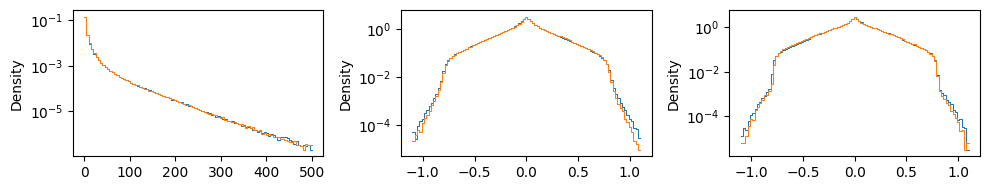

In [5]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(10, 2))

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt[aoj.constituents.mask_bool].numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt[mmf.constituents.mask_bool].numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")


bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_rel[aoj.constituents.mask_bool].numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_rel[mmf.constituents.mask_bool].numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1], log_scale=(False, True), lw=0.75)


bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.phi_rel[aoj.constituents.mask_bool].numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.phi_rel[mmf.constituents.mask_bool].numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2], log_scale=(False, True), lw=0.75)

plt.tight_layout()

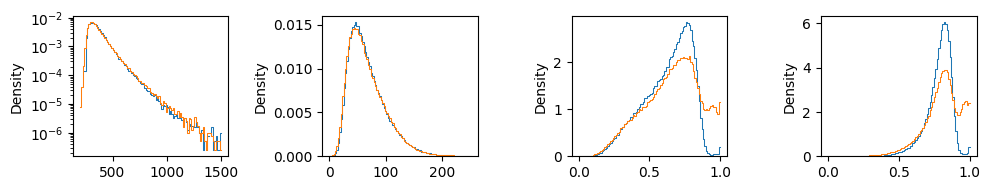

In [7]:

import seaborn as sns

fig, ax = plt.subplots(1, 4, figsize=(10, 2))

bins = np.linspace(200, 1500, 100)
sns.histplot(aoj.pt.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.pt.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")


bins = np.linspace(0, 250, 100)
sns.histplot(aoj.m.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.m.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1], log_scale=(False, False), lw=0.75)


bins = np.linspace(0, 1, 100)
sns.histplot(aoj.tau21,  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.tau21,  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2], log_scale=(False, False), lw=0.75)

bins = np.linspace(0, 1, 100)
sns.histplot(aoj.tau32,  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.tau32,  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3], log_scale=(False, False), lw=0.75)

plt.tight_layout()


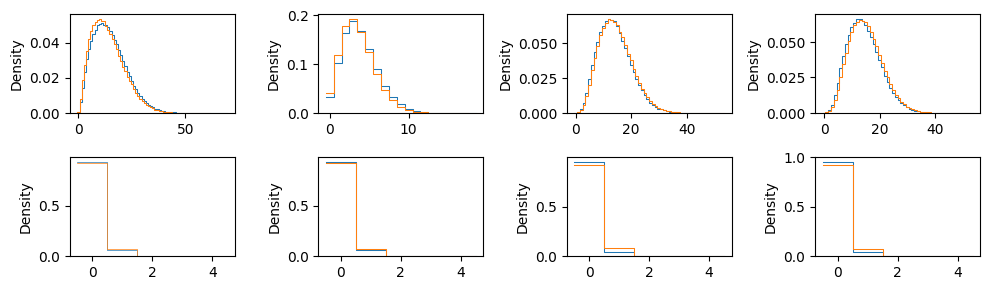

In [8]:
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(10, 3))

sns.histplot(aoj.constituents.num_Photon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,0], lw=0.75)
sns.histplot(mmf.constituents.num_Photon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,0], lw=0.75)

sns.histplot(aoj.constituents.num_NeutralHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,1], lw=0.75)
sns.histplot(mmf.constituents.num_NeutralHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,1], lw=0.75)

sns.histplot(aoj.constituents.num_NegativeHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,2], lw=0.75)
sns.histplot(mmf.constituents.num_NegativeHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,2], lw=0.75)

sns.histplot(aoj.constituents.num_PositiveHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,3], lw=0.75)
sns.histplot(mmf.constituents.num_PositiveHadron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[0,3], lw=0.75)

sns.histplot(aoj.constituents.num_Electron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,0], lw=0.5)
sns.histplot(mmf.constituents.num_Electron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,0], lw=0.5)

sns.histplot(aoj.constituents.num_Positron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,1], lw=0.75)
sns.histplot(mmf.constituents.num_Positron.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,1], lw=0.75)

sns.histplot(aoj.constituents.num_Muon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,2], lw=0.75)
sns.histplot(mmf.constituents.num_Muon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,2], lw=0.75)

sns.histplot(aoj.constituents.num_AntiMuon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,3], lw=0.75)
sns.histplot(mmf.constituents.num_AntiMuon.numpy(), discrete=True, stat="density", element="step", fill=False, ax=ax[1,3], lw=0.75)

plt.tight_layout()


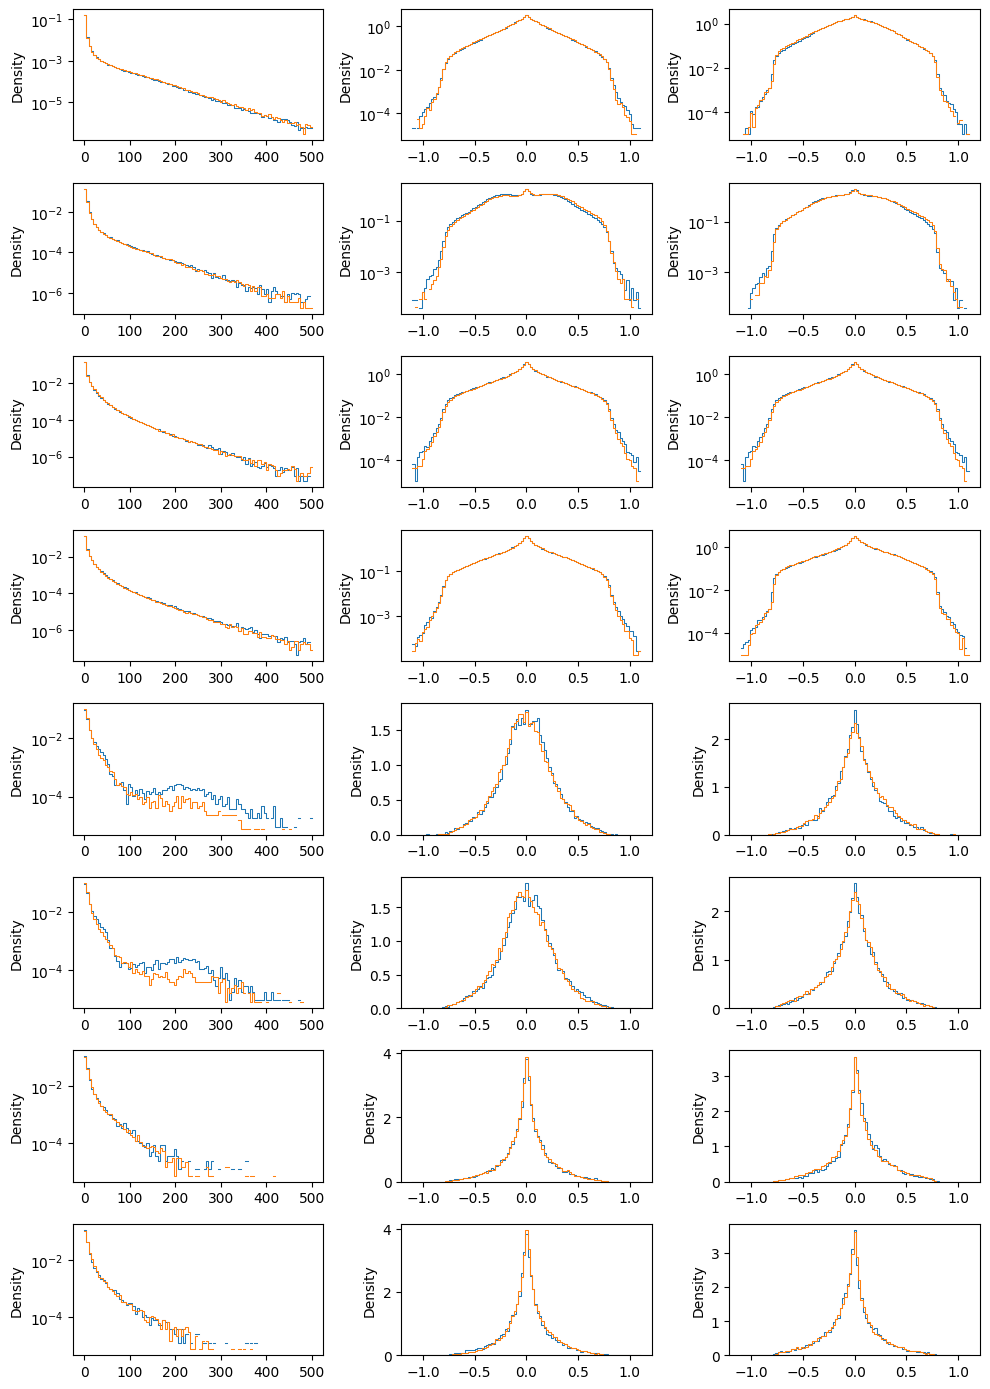

In [9]:
import seaborn as sns

fig, ax = plt.subplots(8, 3, figsize=(10, 14))

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_Photon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_Photon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_Photon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,1], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_Photon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,1], log_scale=(False, True), lw=0.75)
sns.histplot(aoj.constituents.phi_Photon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,2], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.phi_Photon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[0,2], log_scale=(False, True), lw=0.75)


bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_NeutralHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_NeutralHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_NeutralHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,1], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_NeutralHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,1], log_scale=(False, True), lw=0.75)
sns.histplot(aoj.constituents.phi_NeutralHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,2], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.phi_NeutralHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[1,2], log_scale=(False, True), lw=0.75)


bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_NegativeHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_NegativeHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_NegativeHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,1], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_NegativeHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,1], log_scale=(False, True), lw=0.75)
sns.histplot(aoj.constituents.eta_NegativeHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,2], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_NegativeHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[2,2], log_scale=(False, True), lw=0.75)

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_PositiveHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_PositiveHadron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_PositiveHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,1], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.eta_PositiveHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,1], log_scale=(False, True), lw=0.75)
sns.histplot(aoj.constituents.phi_PositiveHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,2], log_scale=(False, True), lw=0.75)
sns.histplot(mmf.constituents.phi_PositiveHadron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[3,2], log_scale=(False, True), lw=0.75) 

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_Electron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_Electron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_Electron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,1], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.eta_Electron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,1], log_scale=(False, False), lw=0.75)
sns.histplot(aoj.constituents.phi_Electron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,2], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.phi_Electron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[4,2], log_scale=(False, False), lw=0.75)

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_Positron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_Positron.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_Positron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,1], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.eta_Positron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,1], log_scale=(False, False), lw=0.75)
sns.histplot(aoj.constituents.phi_Positron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,2], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.phi_Positron.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[5,2], log_scale=(False, False), lw=0.75)

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_Muon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_Muon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_Muon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,1], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.eta_Muon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,1], log_scale=(False, False), lw=0.75)
sns.histplot(aoj.constituents.phi_Muon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,2], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.phi_Muon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[6,2], log_scale=(False, False), lw=0.75)

bins = np.linspace(0, 500, 100)
sns.histplot(aoj.constituents.pt_AntiMuon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,0], log_scale=(False, True), lw=0.75, label="AOJ (truth)")
sns.histplot(mmf.constituents.pt_AntiMuon.numpy(), bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,0], log_scale=(False, True), lw=0.75, label="MMF - ParticleFormer")
bins = np.linspace(-1.1, 1.1, 100)
sns.histplot(aoj.constituents.eta_AntiMuon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,1], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.eta_AntiMuon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,1], log_scale=(False, False), lw=0.75)
sns.histplot(aoj.constituents.phi_AntiMuon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,2], log_scale=(False, False), lw=0.75)
sns.histplot(mmf.constituents.phi_AntiMuon.numpy(),  bins=bins, discrete=False, stat="density", element="step", fill=False, ax=ax[7,2], log_scale=(False, False), lw=0.75)

plt.tight_layout()

In [51]:
mmf_neutral_hadrons.constituents.mask[33].squeeze(-1), mmf_neutral_hadrons.constituents.mask_bool[33].squeeze(-1), mmf_neutral_hadrons.constituents.discrete[33].squeeze(-1)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]),
 tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         Fa

In [26]:

def get_flavor_specific_subjets(sample, flavor):
    """
    Extracts the flavor-specific data from the sample.
    """
    data = sample.clone()
    mask = data.discrete == flavor
    data.continuous *= mask.unsqueeze(-1)
    data.discrete *= mask
    data.mask *= mask.unsqueeze(-1)
    return JetFeatures(data)


# Photons

In [27]:
mmf_photons = get_flavor_specific_subjets(sample, flavor=1)
aoj_photons = get_flavor_specific_subjets(test, flavor=1)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


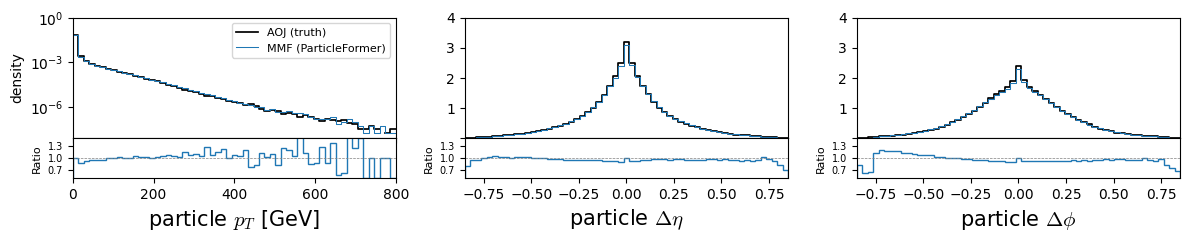

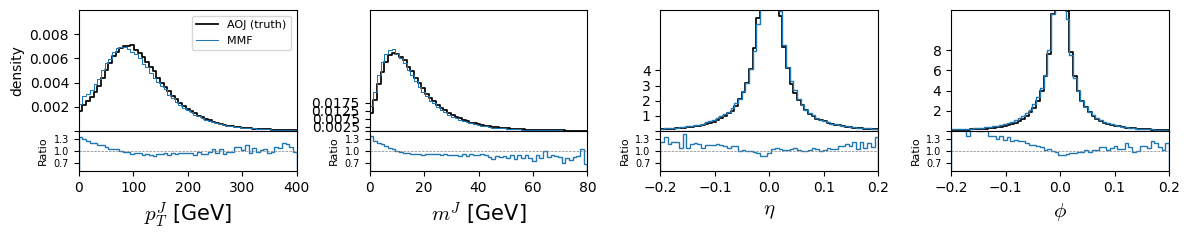

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')

plot_hist_and_ratio(test=aoj_photons.constituents, 
                    gen=mmf_photons.constituents, 
                    gen_ref=None, 
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='pt', 
                    xlim=(0, 800), 
                    ylim=(0,1),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel= r'particle $p_T$ [GeV]', 
                    ylabel='density', 
                    legend1='MMF (ParticleFormer)', 
                    log_scale=(False, True))

plot_hist_and_ratio(test=aoj_photons.constituents, 
                    gen=mmf_photons.constituents, 
                    gen_ref=None, 
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='eta_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'particle $\Delta\eta$')
                    
plot_hist_and_ratio(test=aoj_photons.constituents, 
                    gen=mmf_photons.constituents, 
                    gen_ref=None, 
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='phi_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'particle $\Delta\phi$')

axes[0, 1].set_yticks([0,1,2,3,4])
axes[0, 1].set_yticklabels(['',1,2,3,4])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])

plt.tight_layout()
plt.savefig("particle_level_feats.png", dpi=500)
plt.show()



fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_photons, 
                    gen=mmf_photons, 
                    gen_ref=None,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(0, 400), 
                    ylim=(0, 0.01),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel= r'$p_T^J$ [GeV]', 
                    ylabel='density', 
                    legend1='MMF ', 
                    legend2='CFM ', )

plot_hist_and_ratio(aoj_photons, 
                    mmf_photons, 
                    gen_ref=None,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 80),  
                    ylim=(0, 0.075), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=.75,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_photons, 
                    gen=mmf_photons, 
                    gen_ref=None,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-0.2,0.2), 
                    ylim=(0,8),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_photons, 
                    gen=mmf_photons, 
                    gen_ref=None, 
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-0.2,0.2), 
                    ylim=(0,12),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')


axes[0, 0].set_yticks([0, 0.002,0.004, 0.006, 0.008])
axes[0, 0].set_yticklabels(['', 0.002,0.004, 0.006, 0.008])
axes[0, 1].set_yticks([0,0.0025,0.0075,0.0125,0.0175])
axes[0, 1].set_yticklabels(['',0.0025,0.0075,0.0125,0.0175])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])
axes[0, 3].set_yticks([0,2,4,6,8])
axes[0, 3].set_yticklabels(['',2,4,6,8])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

# Neutral Hadrons

In [29]:
mmf_neutral_hadrons = get_flavor_specific_subjets(sample, flavor=2)
aoj_neutral_hadrons = get_flavor_specific_subjets(test, flavor=2)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


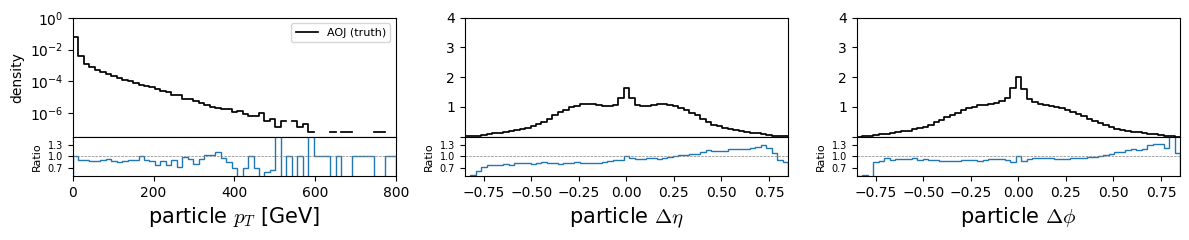

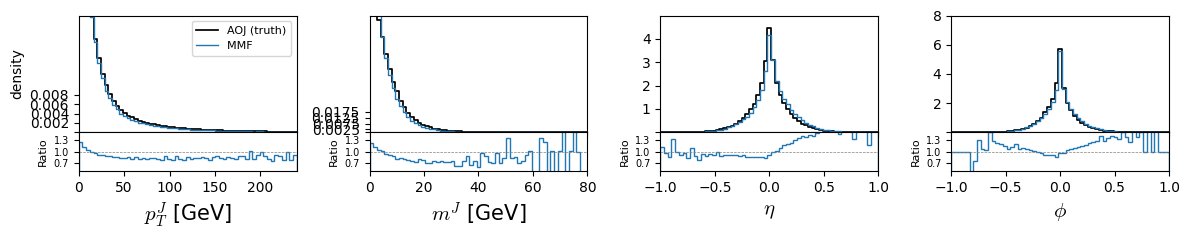

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')

plot_hist_and_ratio(test=aoj_neutral_hadrons.constituents, 
                    gen=mmf_neutral_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='pt', 
                    xlim=(0, 800), 
                    ylim=(0,1),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'particle $p_T$ [GeV]', 
                    ylabel='density', 
                    legend1='MMF (ParticleFormer)', 
                    log_scale=(False, True))

plot_hist_and_ratio(test=aoj_neutral_hadrons.constituents, 
                    gen=mmf_neutral_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='eta_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'particle $\Delta\eta$')
                    
plot_hist_and_ratio(test=aoj_neutral_hadrons.constituents, 
                    gen=mmf_neutral_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='phi_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'particle $\Delta\phi$')

axes[0, 1].set_yticks([0,1,2,3,4])
axes[0, 1].set_yticklabels(['',1,2,3,4])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])

plt.tight_layout()
plt.savefig("particle_level_feats.png", dpi=500)
plt.show()



fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=mmf_neutral_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    feat='pt', 
                    xlim=(0, 240), 
                    ylim=(0, 0.025),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    ylabel='density', 
                    legend1='MMF ', 
                    legend2='CFM ', )

plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=mmf_neutral_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],
                    feat='m', 
                    xlim=(0, 80),  
                    ylim=(0, 0.1), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=mmf_neutral_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,5),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_neutral_hadrons, 
                    gen=mmf_neutral_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3], 
                    feat='phi', 
                    xlim=(-1,1), 
                    ylim=(0,8),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')



axes[0, 0].set_yticks([0, 0.002,0.004, 0.006, 0.008])
axes[0, 0].set_yticklabels(['', 0.002,0.004, 0.006, 0.008])
axes[0, 1].set_yticks([0,0.0025,0.0075,0.0125,0.0175])
axes[0, 1].set_yticklabels(['',0.0025,0.0075,0.0125,0.0175])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])
axes[0, 3].set_yticks([0,2,4,6,8])
axes[0, 3].set_yticklabels(['',2,4,6,8])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

#

# Charged Hadrons

In [43]:
mmf_negative_hadrons = get_flavor_specific_subjets(sample, flavor=3)
aoj_negativel_hadrons = get_flavor_specific_subjets(test, flavor=3)

Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


Clustering jets with fastjet
Jet definition: Longitudinally invariant kt algorithm with R = 0.8 and pt-ordered Winner-Takes-All recombination
Calculating N-subjettiness


NameError: name 'aoj_negative_hadrons' is not defined

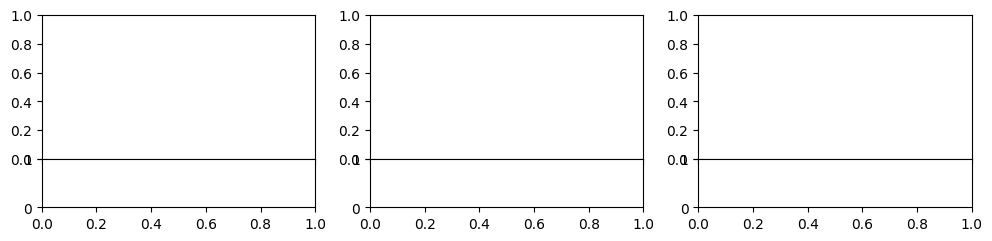

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')

plot_hist_and_ratio(test=aoj_negative_hadrons.constituents, 
                    gen=mmf_negative_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='pt', 
                    xlim=(0, 800), 
                    ylim=(0,1),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'particle $p_T$ [GeV]', 
                    ylabel='density', 
                    legend1='MMF (ParticleFormer)', 
                    legend2='EPiC-CFM (baseline)', 
                    log_scale=(False, True))

plot_hist_and_ratio(test=aoj_negative_hadrons.constituents, 
                    gen=mmf_negative_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='eta_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'particle $\Delta\eta$')
                    
plot_hist_and_ratio(test=aoj_negative_hadrons.constituents, 
                    gen=mmf_negative_hadrons.constituents, 
                    gen_ref=None,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2], 
                    apply_map_test='mask_bool',
                    apply_map_gen='mask_bool',
                    apply_map_gen_ref='mask_bool',
                    feat='phi_rel', 
                    xlim=(-0.85, 0.85),  
                    ylim=(0, 4),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'particle $\Delta\phi$')

axes[0, 1].set_yticks([0,1,2,3,4])
axes[0, 1].set_yticklabels(['',1,2,3,4])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])

plt.tight_layout()
plt.savefig("particle_level_feats.png", dpi=500)
plt.show()



fig, axes = plt.subplots(2, 4, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0}, sharex='col')


plot_hist_and_ratio(test=aoj_negative_hadrons, 
                    gen=mmf_negative_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 0], 
                    ax_ratio=axes[1, 0],  
                    feat='pt', 
                    xlim=(0, 240), 
                    ylim=(0, 0.025),  
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel= r'$p_T^J$ [GeV]', 
                    log_scale=(False, True),
                    ylabel='density', 
                    legend1='MMF ', 
                    legend2='CFM ', )

plot_hist_and_ratio(test=aoj_negative_hadrons, 
                    gen=mmf_negative_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 1], 
                    ax_ratio=axes[1, 1],  
                    feat='m', 
                    xlim=(0, 80),  
                    ylim=(0, 0.1), 
                    num_bins=60, 
                    color_test = 'k',
                    lw=1.0,
                    xlabel=r'$m^J$ [GeV]')
                    
plot_hist_and_ratio(test=aoj_negative_hadrons, 
                    gen=mmf_negative_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 2], 
                    ax_ratio=axes[1, 2],  
                    feat='eta', 
                    xlim=(-1,1), 
                    ylim=(0,5),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\eta$')

plot_hist_and_ratio(test=aoj_negative_hadrons, 
                    gen=mmf_negative_hadrons, 
                    gen_ref=None,
                    ax_hist=axes[0, 3], 
                    ax_ratio=axes[1, 3],  
                    feat='phi', 
                    xlim=(-1,1), 
                    ylim=(0,8),  
                    num_bins=60,
                    color_test = 'k',
                    lw=1.0, 
                    xlabel=r'$\phi$')



axes[0, 0].set_yticks([0, 0.002,0.004, 0.006, 0.008])
axes[0, 0].set_yticklabels(['', 0.002,0.004, 0.006, 0.008])
axes[0, 1].set_yticks([0,0.0025,0.0075,0.0125,0.0175])
axes[0, 1].set_yticklabels(['',0.0025,0.0075,0.0125,0.0175])
axes[0, 2].set_yticks([0,1,2,3,4])
axes[0, 2].set_yticklabels(['',1,2,3,4])
axes[0, 3].set_yticks([0,2,4,6,8])
axes[0, 3].set_yticklabels(['',2,4,6,8])

plt.tight_layout()
plt.savefig("jets_level_feats.png", dpi=500)
plt.show()

In [78]:


class JetChargeDipole:

    """
    Compute pT-weighted jet charge  Q_kappa  and
    the 2-point electric-dipole moment  d2  for every jet.
    """

    def __init__(self, data):

        """
        data: an object with attributes
              .continuous  (pT, eta, phi) padded with zeros
              .charge      integer charges (−1, 0, +1)
              .mask        boolean mask of real particles
        """
        self.x = data.constituents.continuous      # (n, D, 3)
        self.Q = data.constituents.charge          # (n, D)
        self.mask = data.constituents.mask_bool    # (n, D)

        # option: keep only jets that have ≥2 (for d2) or ≥1 (for Q) particles

        n_part = self.mask.sum(dim=1)
        self.valid_Q  = n_part >= 1
        self.valid_d2 = n_part >= 2

    def _delta_R(self, eta, phi):
        d_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
        d_phi = torch.remainder(phi.unsqueeze(1) - phi.unsqueeze(0) + np.pi,
                                2 * np.pi) - np.pi
        return torch.sqrt(d_eta**2 + d_phi**2)

    def charge_and_dipole(self, kappa: float = 1.0, beta: float = 1.0):
        """
        Compute the pT-weighted jet charge  Q_kappa  and the electric–dipole
        moment  d2  for every jet in the batch.

        Returns
        -------
        Q_kappa : 1-D tensor, length = n_valid_jets
        d2      : 1-D tensor, length = n_valid_jets
                (jets with <2 particles get filtered out, like _auto_ecf)
        """

        Q0_list, Qkappa_list, d2_list = [],[],[]     # results for *all* jets
        mask_2_parts = (self.mask.sum(dim=1) >= 2)   # ≥2 real particles

        for idx, jet in enumerate(self.x):        # iterate over jets   (D,3) view

            pT, eta, phi = jet[:, 0], jet[:, 1], jet[:, 2]
            mask = pT > 0
            Q = self.Q[idx][mask].float() 
            pT = pT[mask]
            eta = eta[mask]
            phi = phi[mask]

            # -------------------------------------------------
            #   Jet charge   Q_kappa
            # -------------------------------------------------

            jet_pT = pT.sum()
            
            if jet_pT == 0:
                Qkappa = torch.nan
                Q0 = torch.nan
            else:
                Qkappa = (Q * pT**kappa).sum() / jet_pT
                Q0 = Q.sum() 

            # -------------------------------------------------
            #   Electric-dipole   d2
            # -------------------------------------------------

            if len(jet) < 2:
                d2 = torch.nan
            else:
                # pair-wise ΔR
                d_eta = eta.unsqueeze(1) - eta.unsqueeze(0)
                d_phi = torch.remainder(phi.unsqueeze(1) - phi.unsqueeze(0) + torch.pi,
                                        2 * torch.pi) - torch.pi
                R_ij  = torch.sqrt(d_eta**2 + d_phi**2).pow(beta)   # (N,N)

                weight   = (Q * pT).unsqueeze(1) * (Q * pT).unsqueeze(0)
                dip_mat  = weight * R_ij / 2.0          # divide-by-2 like _auto_ecf
                d2       = dip_mat.sum() / jet_pT**2

            Q0_list.append(Q0)
            Qkappa_list.append(Qkappa)
            d2_list.append(d2)

        # tensor-ise and filter exactly like _auto_ecf
        Q0 = torch.tensor(Q0_list)
        Qkappa  = torch.tensor(Qkappa_list)
        d2 = torch.tensor(d2_list)

        Q0  = Q0[mask_2_parts]
        Qkappa = Qkappa[mask_2_parts]
        d2 = d2[mask_2_parts]

        return Q0, Qkappa, d2


In [80]:
aoj_dipole = JetChargeDipole(aoj)           # `data` is your padded batch
mmf_dipole = JetChargeDipole(mmf)

aoj_charge, aoj_jet_charge, aoj_jet_dipole = aoj_dipole.charge_and_dipole()
mmf_charge, mmf_jet_charge, mmf_jet_dipole = mmf_dipole.charge_and_dipole()


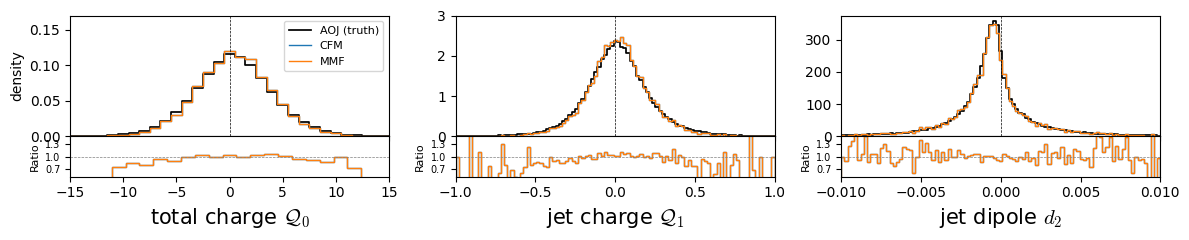

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(12, 2.5), gridspec_kw={'height_ratios':[3,1], 'hspace': 0.0}, sharex='col')

num_bins=100

plot_hist_and_ratio(aoj, 
                    mmf,
                    mmf,  
                    axes[0, 0], axes[1, 0], 
                    feat='charge',
                    xlim=(-15,15), 
                    ylim=(0, 0.17),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=24, 
                    discrete=True,
                    xlabel=r'total charge $\mathcal{Q}_0$', 
                    ylabel='density', 
                    legend1='CFM', 
                    legend2='MMF')


plot_hist_and_ratio(aoj,
                    mmf,
                    mmf,  
                    axes[0, 1], axes[1, 1], 
                    feat='jet_charge',
                    xlim=(-1,1), 
                    ylim=(0, 3),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=num_bins, 
                    xlabel=r'jet charge $\mathcal{Q}_1$', 
                    )

plot_hist_and_ratio(aoj_jet_dipole, 
                    mmf_jet_dipole, 
                    mmf_jet_dipole,  
                    axes[0, 2], axes[1, 2], 
                    xlim=(-.01,.01), 
                    ylim=(0, 375),
                    color_test = 'k',
                    lw=1.0, 
                    num_bins=num_bins, 
                    xlabel=r'jet dipole $d_2$',
                    # log_scale=(False, True),

                    )
# add vertical liune at x=0
axes[0, 0].axvline(x=0, color='k', linestyle='--', lw=0.5)
axes[0, 1].axvline(x=0, color='k', linestyle='--', lw=0.5)
axes[0, 2].axvline(x=0, color='k', linestyle='--', lw=0.5)

plt.tight_layout()
plt.savefig("dipole.png", dpi=500)
plt.show()


In [35]:
import numpy as np
import torch
from argparse import ArgumentParser
from pytorch_lightning.loggers import CometLogger
import pytorch_lightning as L
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from transformers import GPT2Config

from utils.tensorclass import TensorMultiModal
from utils.aoj import AspenOpenJets 
from utils.datasets import MultiModalDataset, DataCoupling, data_coupling_collate_fn
from utils.callbacks import GPTGeneratorCallback
from model.MMF import MultiModalFlowBridge


experiment_id = "efb5ee16ee754d639dfd041b33e8883c"
num_jets = 100

mmf = MultiModalFlowBridge.load_from_checkpoint(f"/home/df630/Multimodal-flows/jet_sequences/{experiment_id}/checkpoints/best.ckpt")
mmf.num_timesteps = 100
#...dataset & dataloaders:


aoj = AspenOpenJets(data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch1.h5")
test, metadata = aoj(num_jets=num_jets,
                download=False,
                features={"continuous": ['pt', 'eta_rel', 'phi_rel'], "discrete": "tokens"},
                pt_order=True,
                padding='zeros')


gauss_noise = torch.randn_like(test.continuous) * test.mask
cat_noise = torch.randint_like(test.discrete, 1, mmf.vocab_size) * test.mask
t0 = torch.full((len(cat_noise),), mmf.time_eps)  # (B) t_0=eps

source = TensorMultiModal(continuous=gauss_noise, discrete=cat_noise, mask=test.mask.clone(), time=t0)
source = source.to(mmf.device)


data = DataCoupling(source=source, target=TensorMultiModal())

sample = mmf.simulate_dynamics(data)
sample.target.apply_mask()
sample = sample.target.detach().cpu() 


/home/df630/Multimodal-flows/multimodal_flows/utils/aoj.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))
